In [38]:
%matplotlib inline
import sys
sys.path.append("..")

In [39]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [40]:
# load the file from the experiments directories

df = pd.DataFrame({})
for run in range(10):    
    fpath = os.path.join(
        "..",
        "experiments",
        "cifar100-vgg19_bn-run{}".format(run),
        "out",
        "epoch.out"
    )
    tlog = TabLogger(fpath, resume=True)
    tlog.close()

    # add the run column to the data dictionary
    dd = tlog.numbers
    dd["Run"] = ["Run{}".format(run)] * len(list(dd.values())[0])

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [41]:
print(df)

     Epoch  Train Task Loss  Train Acc  Eval Task Loss  Eval Acc     LR   Run
0      0.0         4.653552      1.488        4.505377      2.34  0.100  Run0
1      1.0         4.201894      4.332        4.076854      5.68  0.100  Run0
2      2.0         3.866523      8.080        3.768365      9.97  0.100  Run0
3      3.0         3.601185     12.004        3.546763     13.97  0.100  Run0
4      4.0         3.304286     16.884        3.462945     16.08  0.100  Run0
..     ...              ...        ...             ...       ...    ...   ...
159  159.0         0.009764     99.860        1.478205     73.11  0.001  Run9
160  160.0         0.009133     99.838        1.479901     73.16  0.001  Run9
161  161.0         0.010223     99.796        1.481426     73.09  0.001  Run9
162  162.0         0.009247     99.832        1.476014     73.19  0.001  Run9
163  163.0         0.009659     99.822        1.477621     73.17  0.001  Run9

[1640 rows x 7 columns]


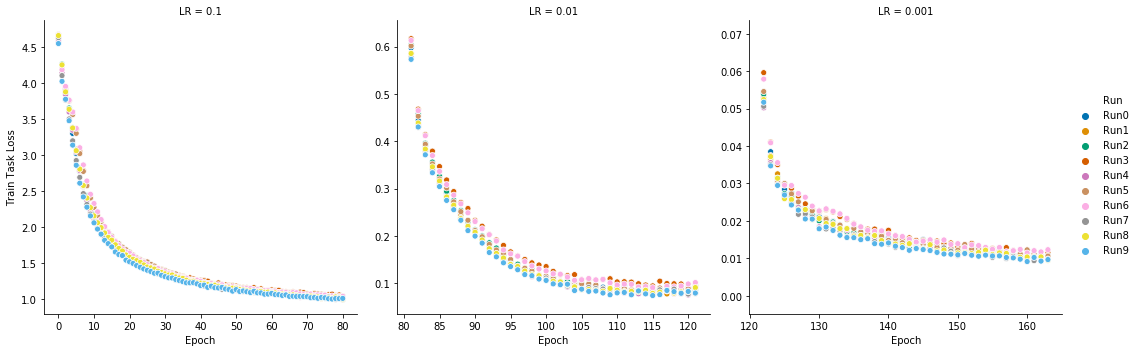

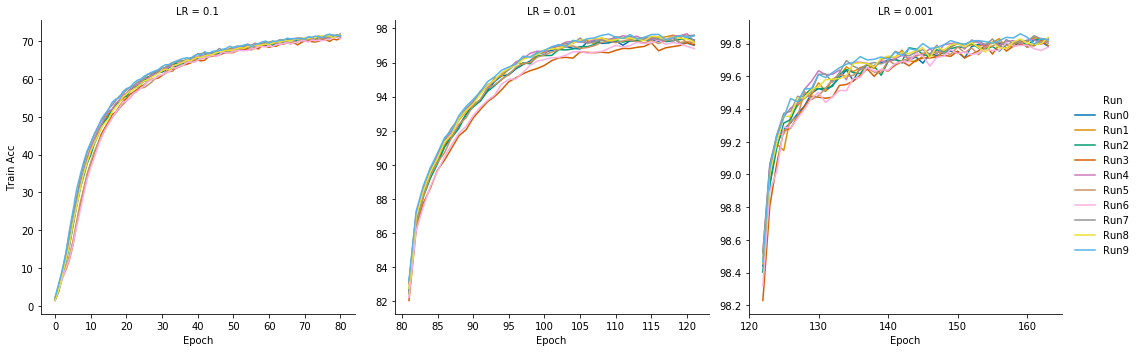

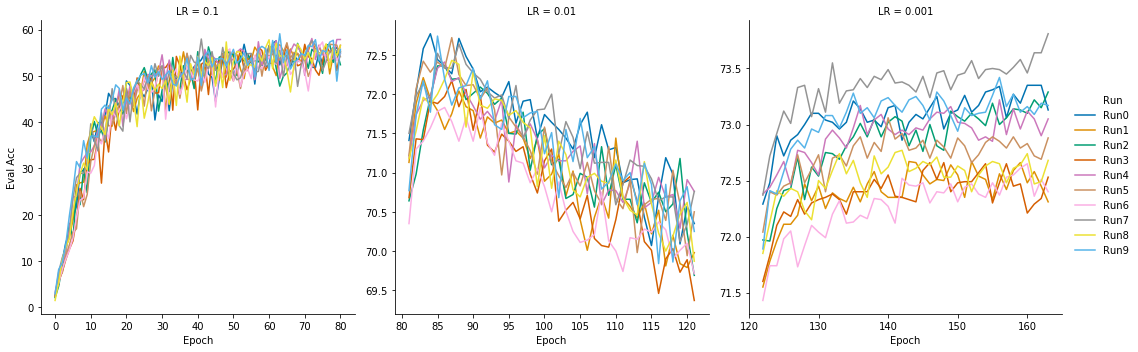

In [49]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


tl = sns.relplot(
    x="Epoch", y="Train Task Loss", hue="Run", data=df,
    col_order=[0.1, 0.01, 0.001], kind="scatter", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
plt.savefig("train_loss-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()
ta = sns.relplot(
    x="Epoch", y="Train Acc", hue="Run", data=df,
    col_order=[0.1, 0.01, 0.001], kind="line", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
plt.savefig("train_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()
ea = sns.relplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df,
    col_order=[0.1, 0.01, 0.001], kind="line", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
# g.set_yscale("log")
plt.savefig("eval_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()

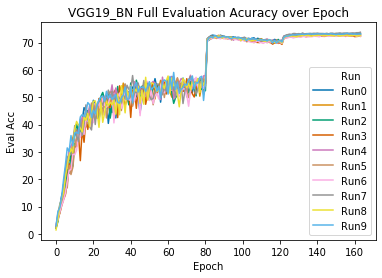

In [51]:
ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df,
    palette="colorblind"
)
ea.set(title="VGG19_BN Full Evaluation Acuracy over Epoch")
plt.savefig("eval_acc-cifar100-vgg19_bn-full-nofacet.png", dpi=200)
# g.set_yscale("log")
plt.show()